In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

pd.options.mode.chained_assignment = None

# **Patient Attendance Data**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/DAV sem 6/JK-Allopathic-Outpatient_attendance-May-2019 - JK-Allopathic-Outpatient_attendance-May-2019.csv")
df1.head()

,District,Facility Type,Total No. of Facilities #,No. of facilities reporting nil performance *,Performance - Overall Average **,Performance - Maximum,Performance - Minimum,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000
0,Anantnag,DH,2,0,34828,41255,28402,0,0,0,2
1,Anantnag,CHC,5,0,10674,16209,5986,0,0,0,5
2,Anantnag,SC,154,10,42,300,2,137,7,0,0
3,Badgam,DH,1,0,23012,23012,23012,0,0,0,1
4,Badgam,CHC,9,0,9446,16828,4151,0,0,0,9


1. Compute total patient attendance for all district for all four range group and plot the bar
diagram. Set the bar plot parameters for better visualization.

<Axes: ylabel='District'>

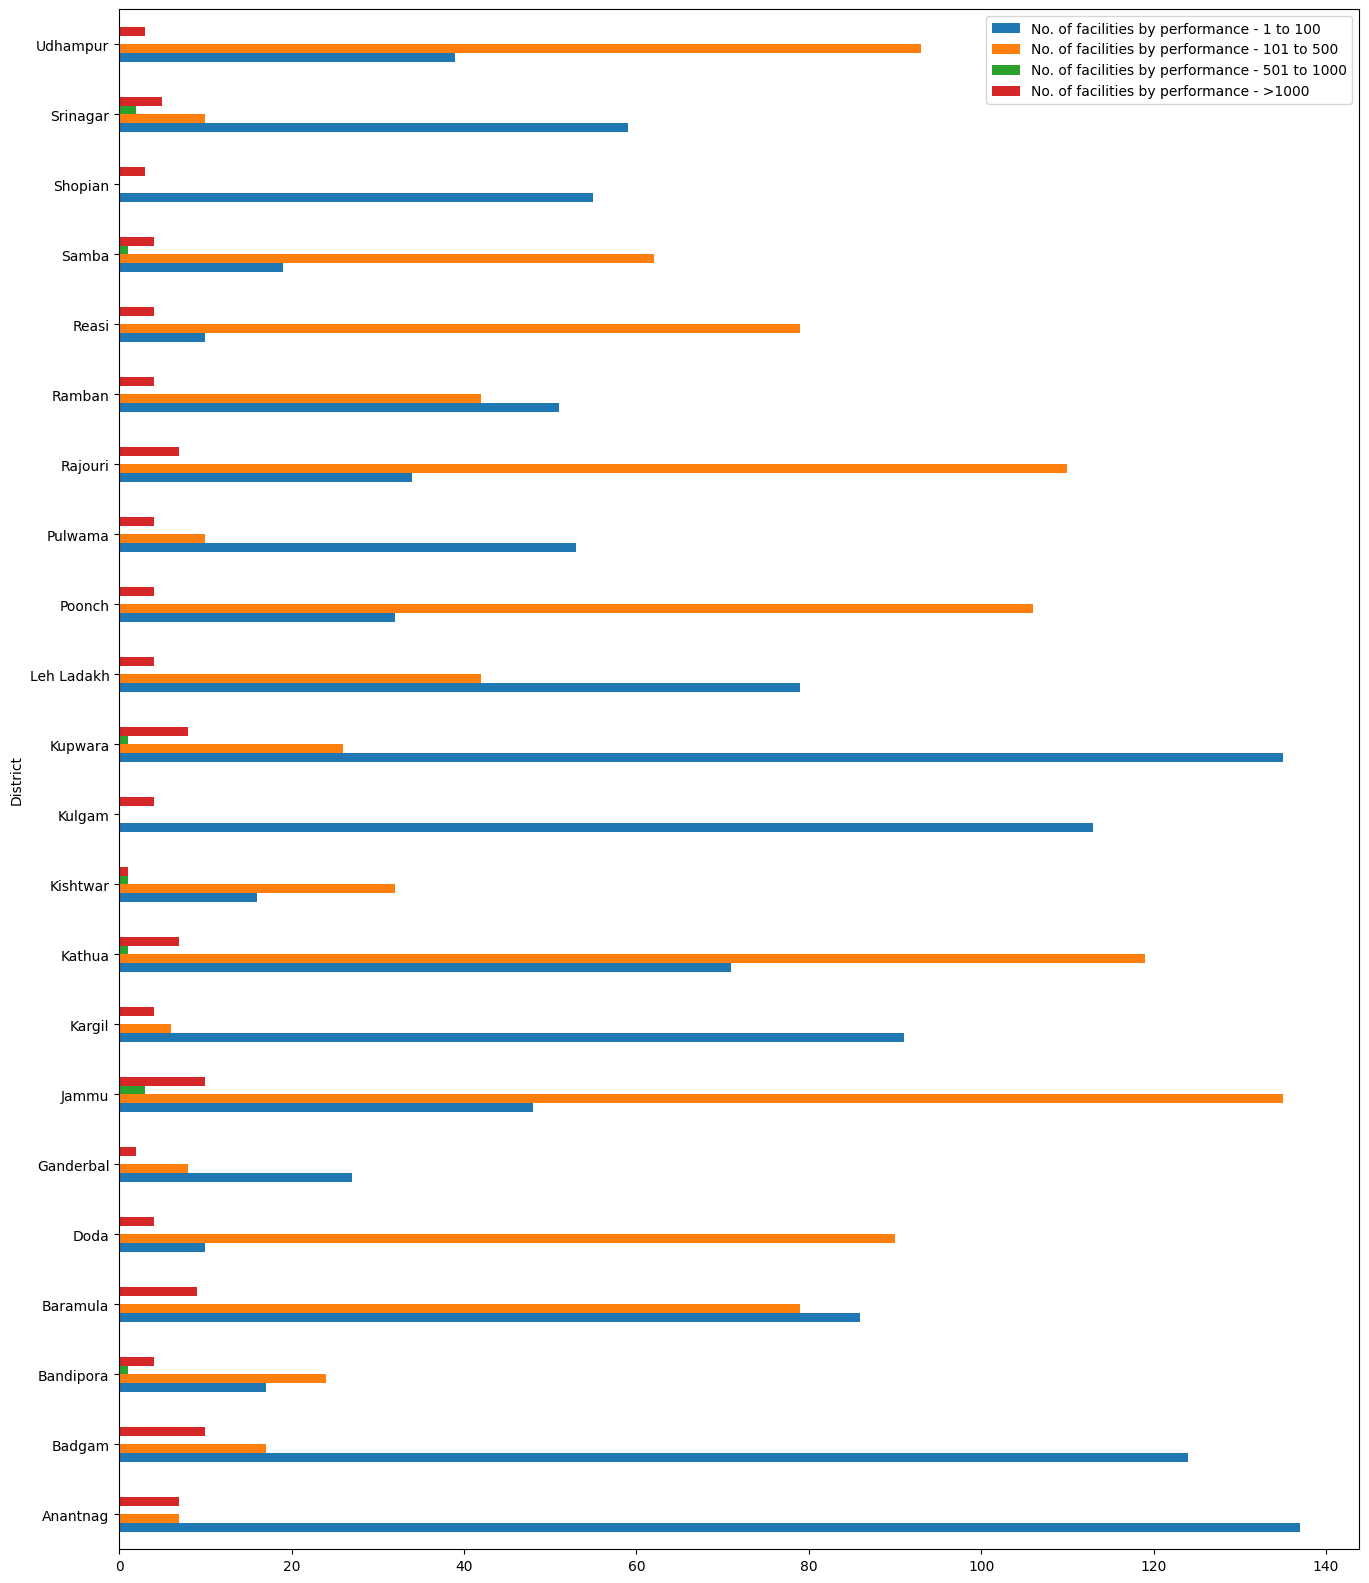

In [ ]:
df_group1 = df1.groupby(by="District")[["No. of facilities by performance - 1 to 100", "No. of facilities by performance - 101 to 500", "No. of facilities by performance - 501 to 1000", "No. of facilities by performance - >1000"]].sum()
df_group1.plot(kind='barh', figsize=(16,20))

2. Compute total patient attendance for all district for each Facility Type (DH, CHC and SC) for all
four range groups and plot the stacked bar diagram of three. Set the bar plot parameters for
better visualization.

<Axes: xlabel='District'>

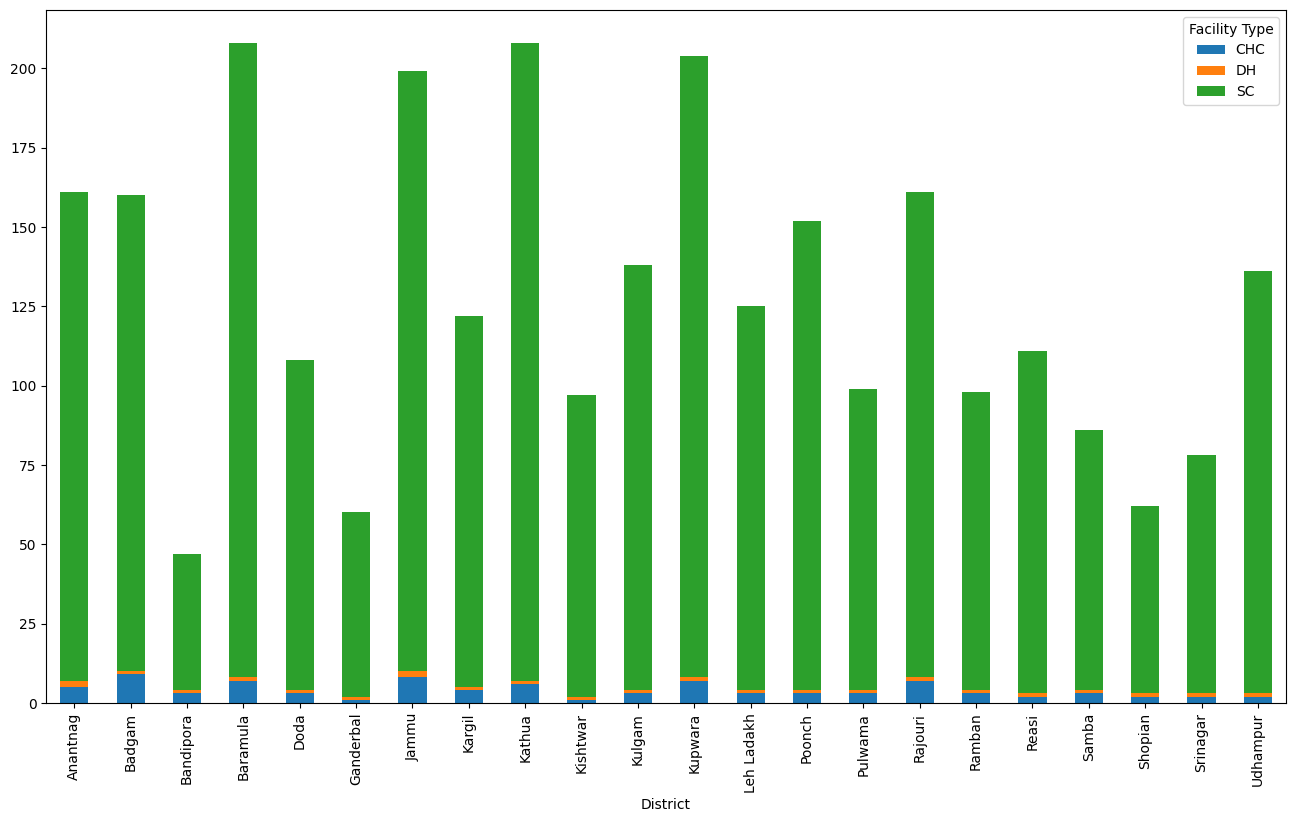

In [ ]:
cols = ['District', 'Facility Type', 'Total No. of Facilities #']
df_group2 = df1[cols]
df_group2 = df_group2.pivot_table(index='District', columns='Facility Type', values='Total No. of Facilities #')
df_group2.plot(kind='bar', stacked=True, figsize=(16,9))

3. Plot group bar plot for Performance - Overall Average of different Facility Type (DH, CHC and
SC) of Anantnag, Jammu, Poonch, Reasi and Udhampur.

<Axes: xlabel='Facility Type'>

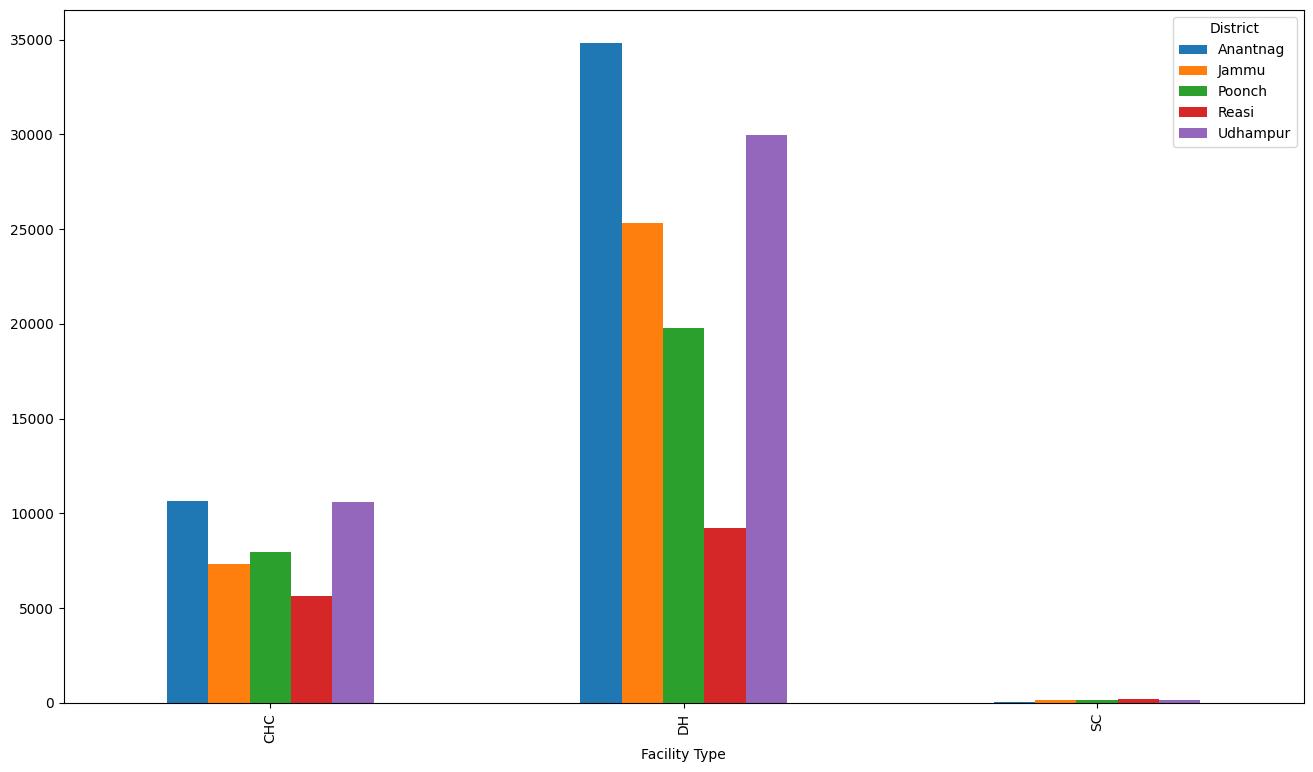

In [ ]:
df_group3 = df1.pivot_table('Performance - Overall Average **', index='District', columns='Facility Type')
df_group3 = df_group3.T[['Anantnag', 'Jammu', 'Poonch', 'Reasi','Udhampur']]
df_group3.plot(kind='bar', figsize=(16,9))

4. Present dot plot for Performance - Maximum of any 20 different district. Performance - Maxi
mum for different Facility Type should be combined appropriately using a aggregation function
for each district.

<ipython-input-8-4a9038509a0b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_group4['District'], rotation=30);


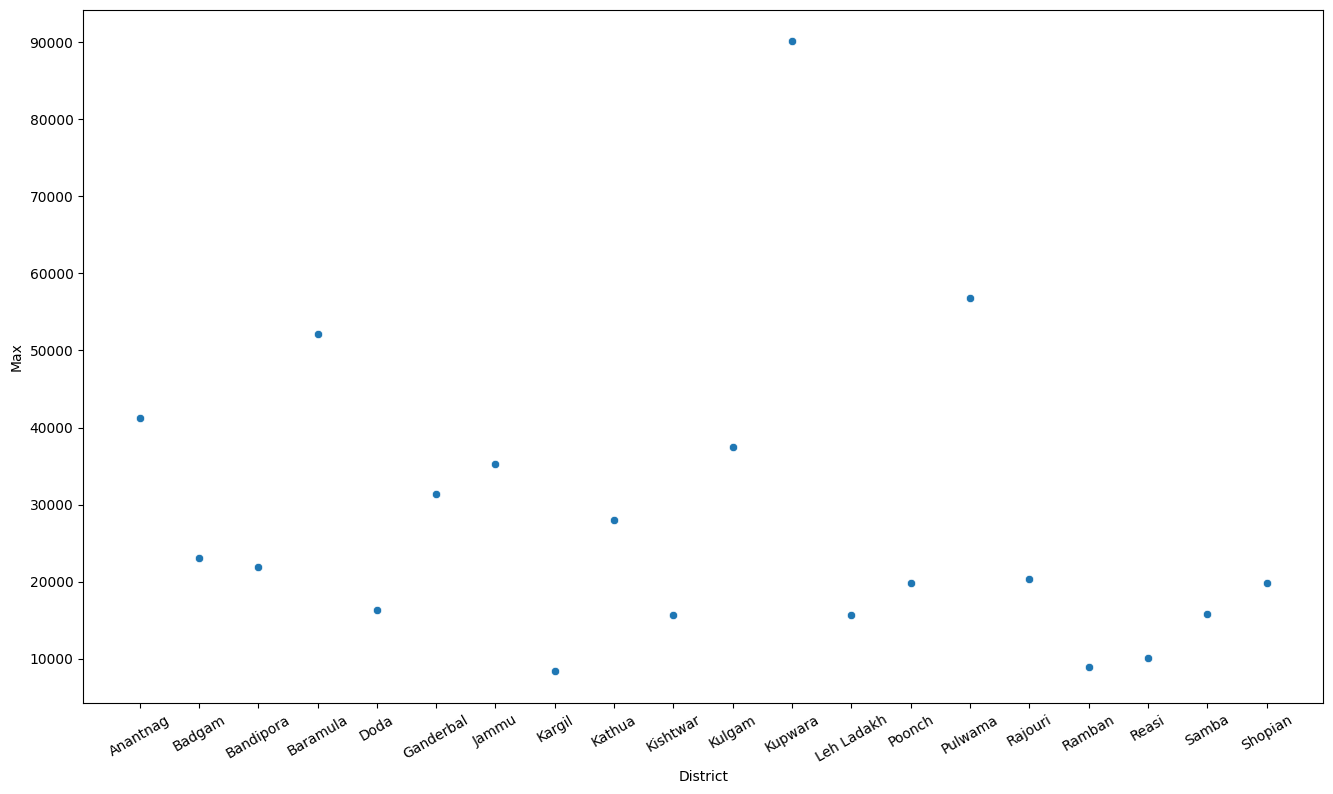

In [ ]:
df_group4 = df1.groupby(['District']).agg(Max = ('Performance - Maximum', 'max'))
df_group4 = df_group4.iloc[:20]
df_group4 = df_group4.reset_index()
fig, ax = plt.subplots(figsize=(16,9))
ax=sns.scatterplot(data=df_group4, x='District', y='Max');
ax.set_xticklabels(labels=df_group4['District'], rotation=30);

# **Fifa Player Profile**

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/DAV sem 6/Fifa_player_football_data - Fifa_player_football_data.csv")
df2.set_index(['ID'])


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,18202,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
243165,18203,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
241638,18204,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K


1. Present Age of various football players as histogram and kernel density plots. Set appropriate
parameters of the plot.

<Axes: xlabel='Age', ylabel='Count'>

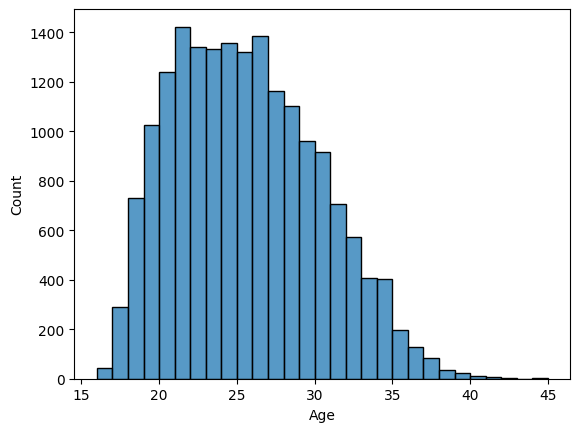

In [ ]:
df2_group1 = df2[["ID", "Name", "Age"]]
sns.histplot(data=df2_group1, x="Age", binwidth=1)

<Axes: xlabel='Age', ylabel='Count'>

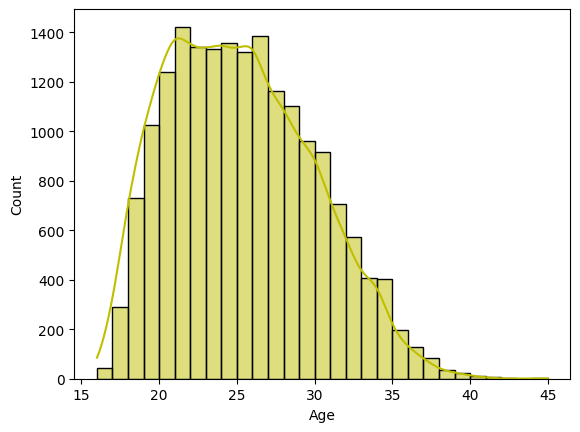

In [ ]:
sns.histplot(data=df2_group1, x="Age", binwidth=1, kde=True, color='y')

2. Present Age of various Football players as Kernel Density plots for each of FC Barcelona,
Chelsea, Juventus and Real Madrid Clubs. Set appropriate parameters of the plot.

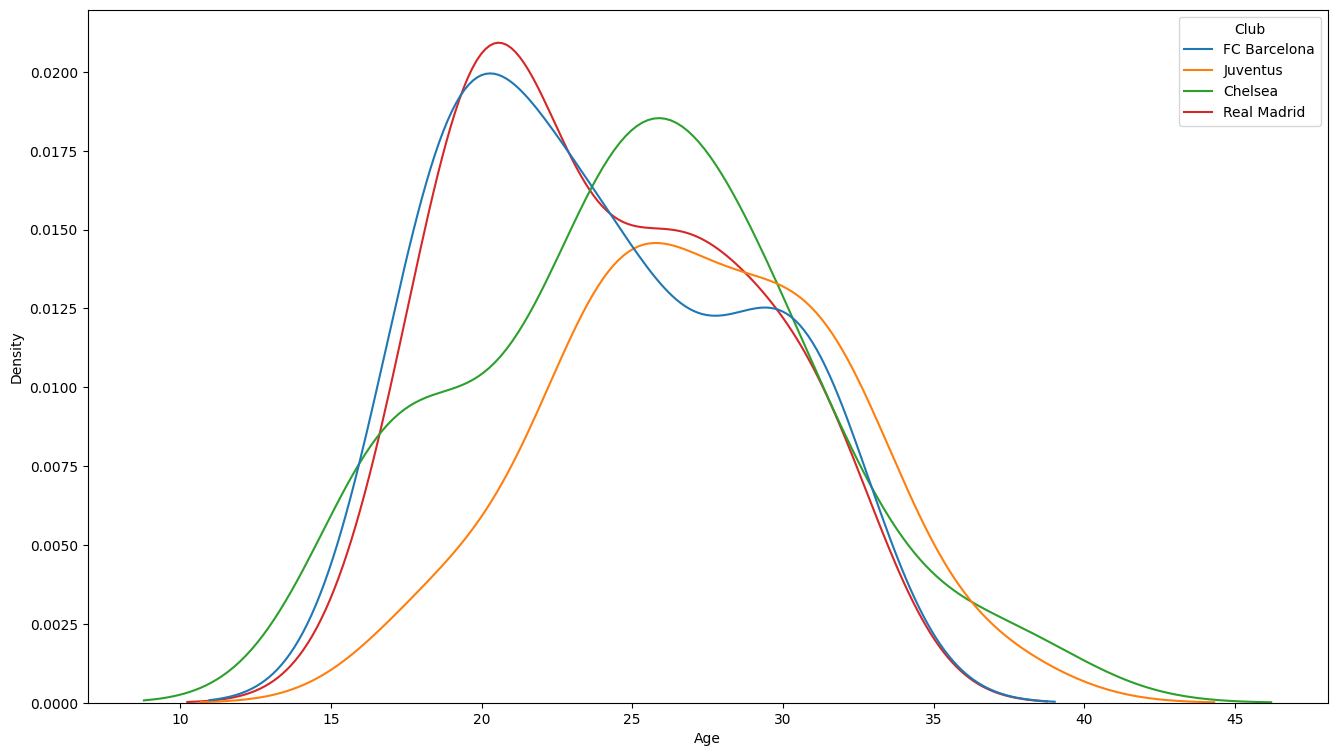

In [ ]:
df2_group2 = df2.loc[df2['Club'].isin(['FC Barcelona','Chelsea','Juventus','Real Madrid'])]
plt.figure(figsize=(16,9))
sns.kdeplot(data=df2_group2, x="Age",hue="Club");

3. Plot Value of players as Stacked Histogram Preferred Foot wise (right and left).

<ipython-input-13-16d5bc538f80>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2_group3.loc[:, 'Value']=df2_group3.apply(change_val, axis=1)


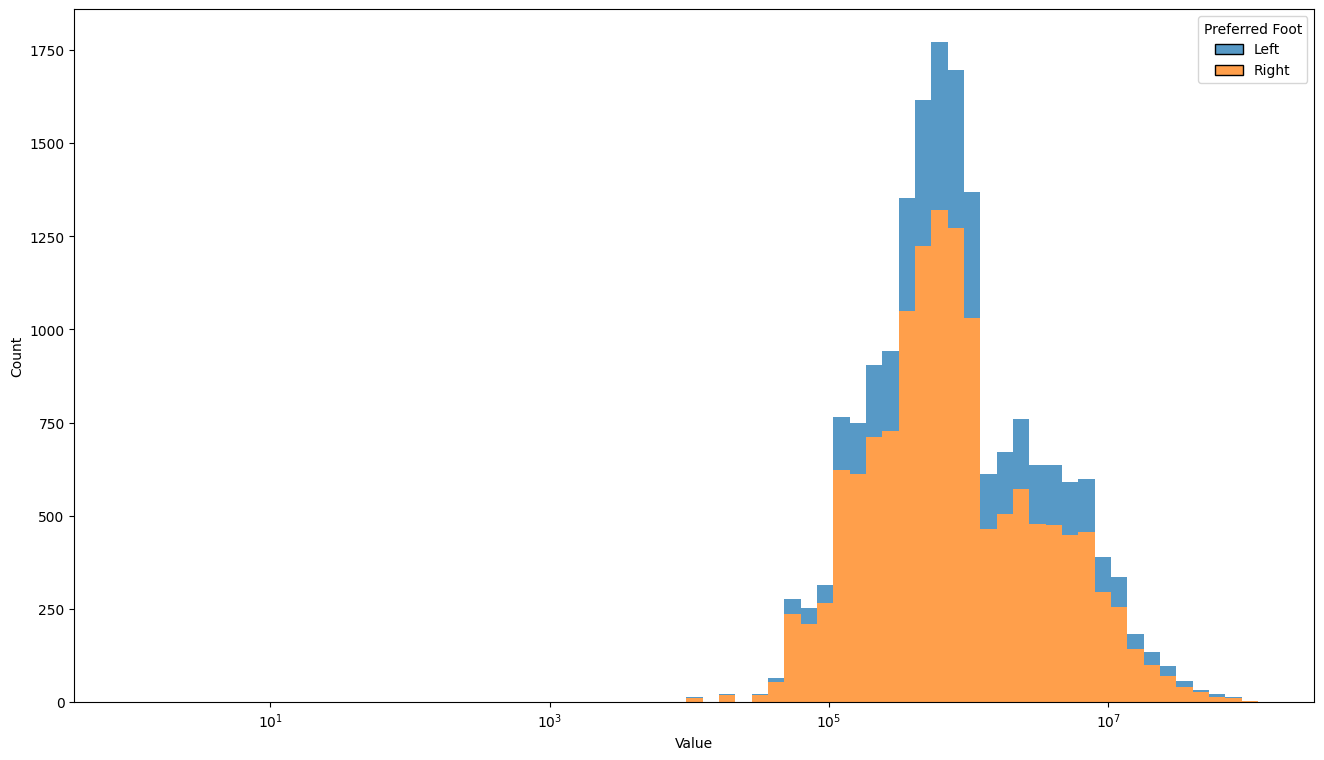

In [ ]:
def change_val(row):
    value = row['Value'][1:]
    if 'K' in value:
        return float(value.replace('K',''))*1000
    if 'M' in value:
        return float(value.replace('M',''))*1000000
    return float(value)
df2_group3 = df2[['Value', 'Preferred Foot']]
df2_group3.loc[:, 'Value']=df2_group3.apply(change_val, axis=1)
bins=np.logspace(0, np.log10(df2_group3['Value'].max()), 70)
plt.figure(figsize=(16,9))
sns.histplot(data=df2_group3, x='Value', stat='count', hue='Preferred Foot', multiple='stack', bins=bins)
plt.xscale('log')


4. Check distribution of International Reputation using Q-Q plot.

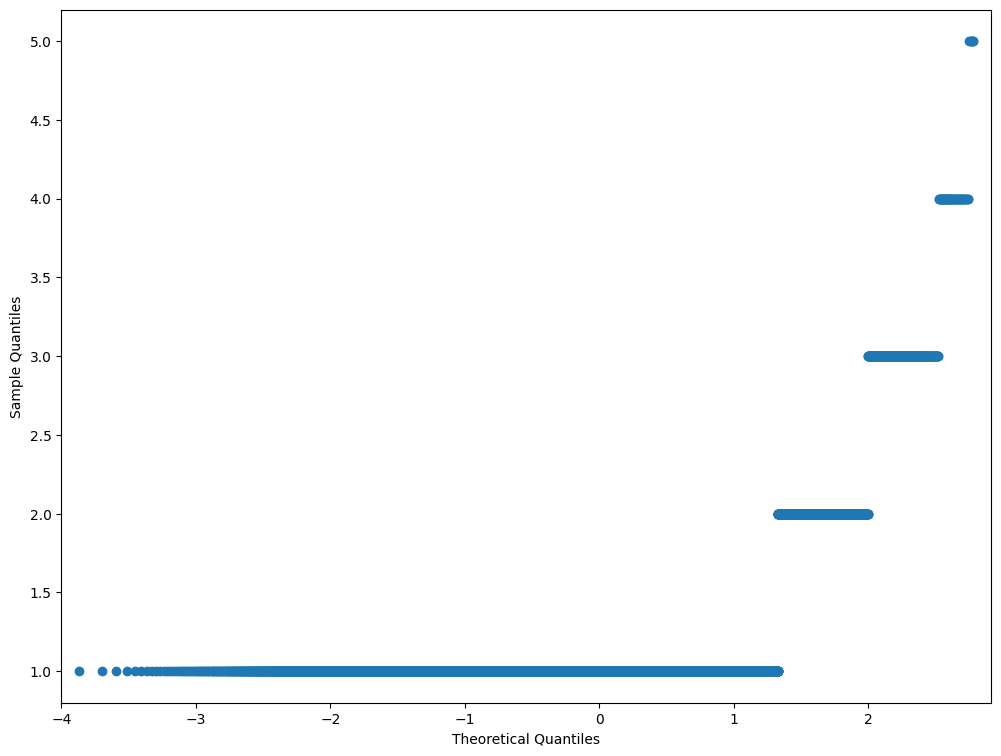

In [ ]:
df2_group4 = df2['International Reputation']
plt.figure(figsize=(12,9))
ax = plt.gca()
qqplot(df2_group4,line='s', ax=ax)
plt.show()